# Computer Vision Basics with openCV

### Import statements

In [2]:
import cv2
import numpy as np
import sys
print('setup complete')

setup complete


### Check your openCV version

In [3]:
cv2.__version__

'4.5.2'

## Computer Vision Basics

### Load and Image

In [4]:
# Declare a variable with the path to your image

img = cv2.imread(cv2.samples.findFile("annotations.jpg"))

In [5]:
# Load the image with openCV
if img is None:
    sys.exit("Could not read the image.")
    
cv2.imshow('OpenCV imshow()', img) 

# The OpenCV waitKey() function is a required keyboard binding 
# function after imwshow
k = cv2.waitKey(0)

# destroy all windows command
cv2.destroyAllWindows()

[Hint](# "You will need to use cv2.imread")

### Check the image type

In [6]:
# find the shape of the image

print(type(img))

cv2.imread("annotations.jpg", cv2.IMREAD_COLOR).shape

<class 'numpy.ndarray'>


(576, 768, 3)

In [7]:
# What is the image type? -> type
cv2.imread('annotations.jpg', cv2.IMREAD_COLOR).dtype 

dtype('uint8')

In [8]:
#find the grayscale shape of the image
cv2.imread('annotations.jpg', cv2.IMREAD_GRAYSCALE).shape

(576, 768)

[Hint](# "Just use the python type function")

In [9]:
# Print the value of the pixels of the image

img[0] #remove the index to show the values of entire image

array([[ 50,  56,  55],
       [ 52,  58,  57],
       [ 54,  60,  59],
       ...,
       [ 35,  95, 137],
       [ 27,  54,  91],
       [ 56,  68,  62]], dtype=uint8)

[Hint](# "Just use the python print function")

### Show the image using openCV

In [26]:
# Lets now see the image! dont forget to call destroyAllWindows!

cv2.imshow('OpenCV imshow()', img) 

# The OpenCV waitKey() function is a required keyboard binding 
# function after imwshow
k = cv2.waitKey(0)

# destroy all windows command
cv2.destroyAllWindows()

[Hint](# "You need to use imshow, waitkey and destroyAllWindows")

### Now lets display using matplotlib

In [11]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

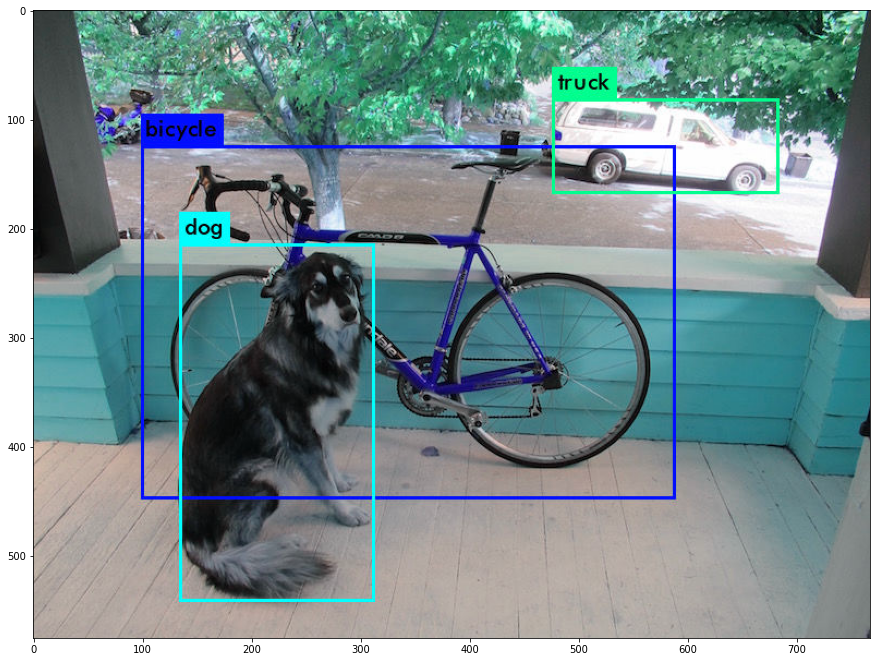

In [12]:
# Choose a pyplot figsize to make images fit nicely into the notebook

plt.figure(figsize = (15,20))

# Now display the image with plt
plt.imshow(img);

### Lets fix the colors

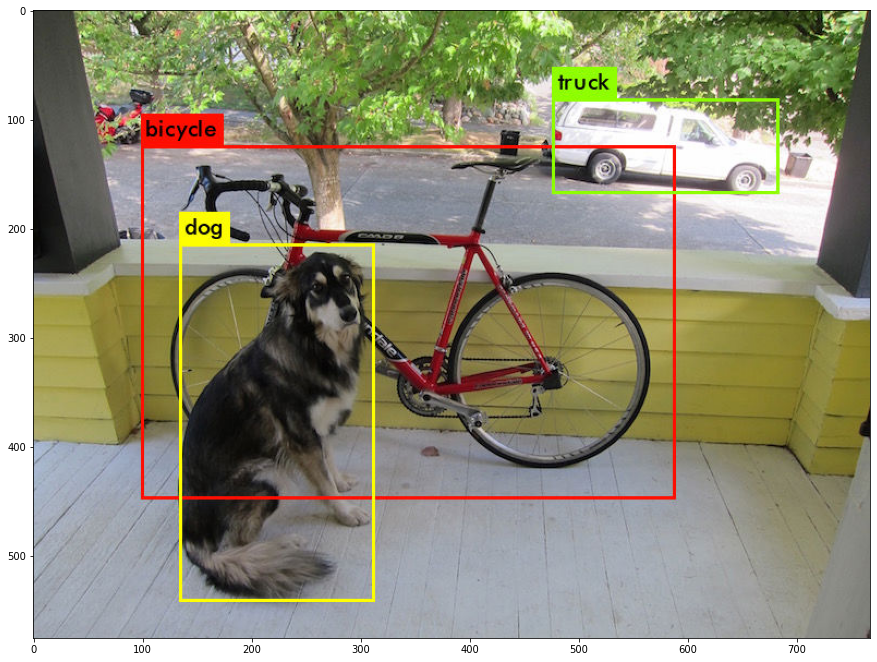

In [13]:
# Does your image look ok? are the colors the right ones?, if not, lets fix it!
# Remember that openCV will load images using BGR rather than RGB
# Change the image to RGB and diplay it again with plt

rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert BGR to RGB
plt.figure(figsize = (15,20))
plt.imshow(rgb_image)

[Hint](# "use cvtColor") 

### What is the shape of the image?

In [14]:
# Check the image shape
rgb_image.shape

(576, 768, 3)

### Lets make it grayscale

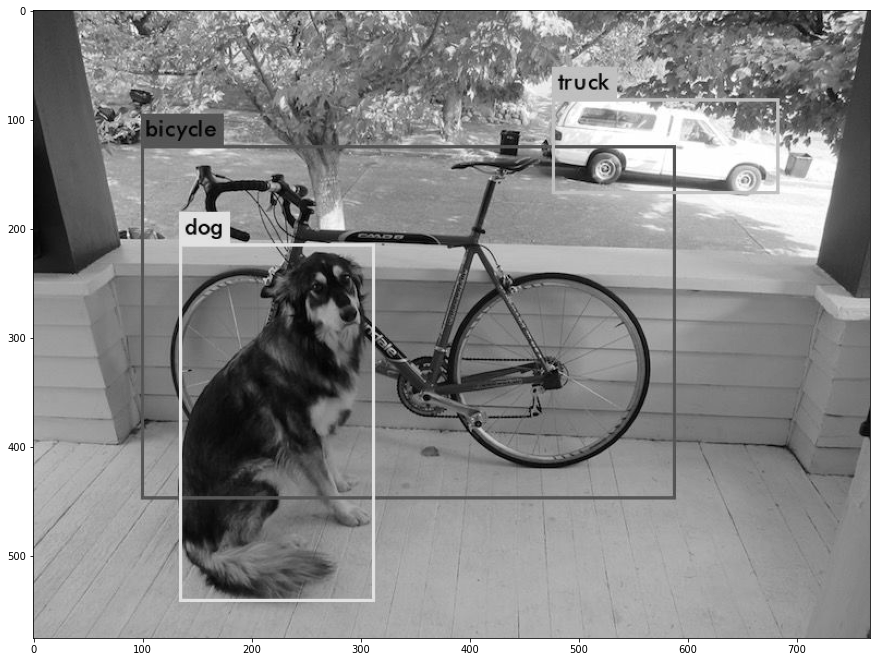

In [15]:
# Load the the image in grayscale, what are the 2 ways you can do that?

gray_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (15,20))

#plt.imshow(gray_image) # without grayscale colormap
plt.imshow(gray_image, cmap = 'gray')

In [16]:
# Now load an image in color and then transform it to grayscale
uni = cv2.imread('leibniz.jpg')
uni_gray = cv2.cvtColor(uni, cv2.COLOR_BGR2GRAY)

#show the grayscaled image
cv2.imshow('OpenCV imshow()', uni_gray) 
k = cv2.waitKey(0)
# destroy all windows command
cv2.destroyAllWindows()

### What is the shape now?

In [17]:
# Check the grayscale shape
uni_gray.shape

(320, 568)

### How does it look like?

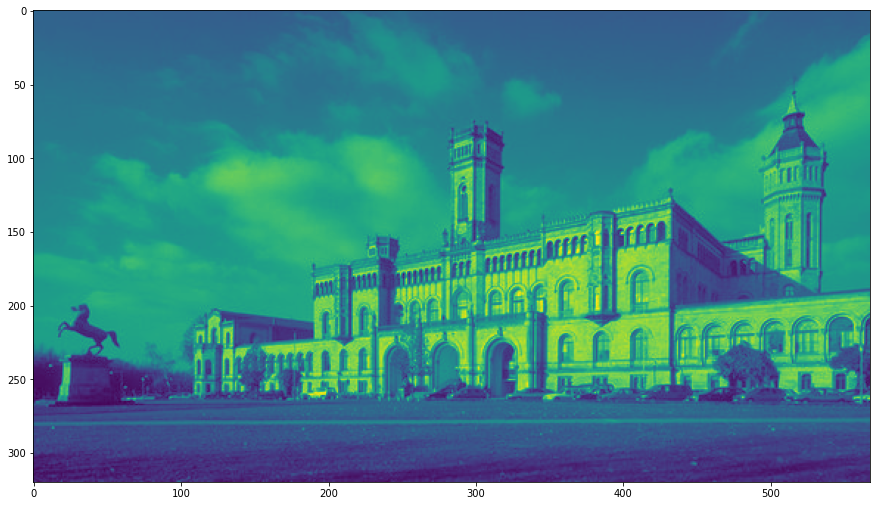

In [18]:
# Display the grayscale image with matplotlib, how does it look?
plt.figure(figsize = (15,20))

#plt.imshow(gray_image) #why does it show diff color even after converting
plt.imshow(uni_gray)

### We need to indicate the colormap

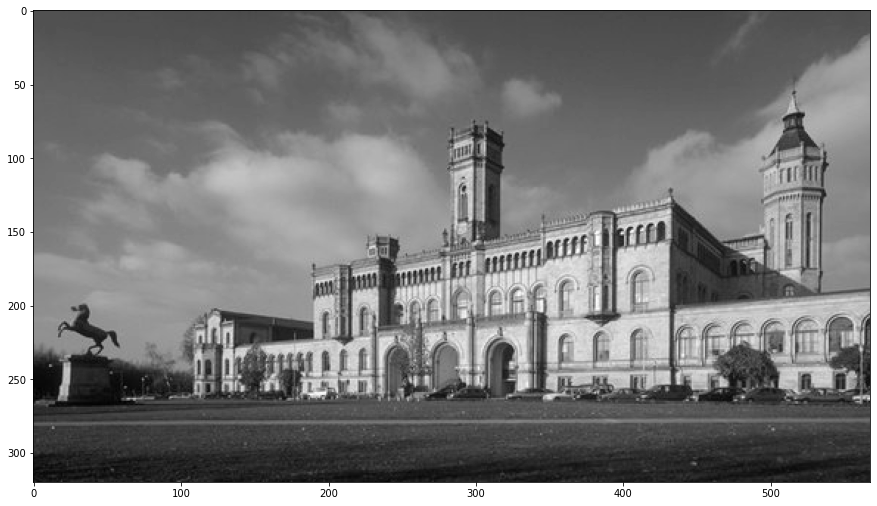

In [19]:
# Display the grayscale image with matplotlib, make sure to include the colormap so it really is grayscale
plt.figure(figsize = (15,20))

#plt.imshow(gray_image) #why does it show diff color even after converting
plt.imshow(uni_gray, cmap = 'gray')

### Cropping an image

(320, 568)


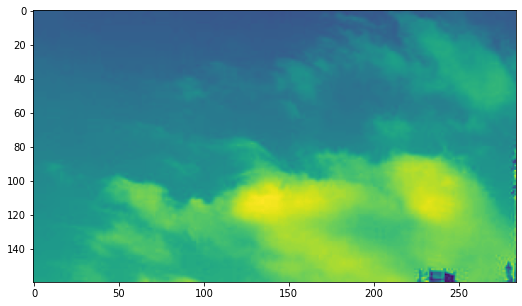

In [20]:
# Lets now crop a Region of Interest of an image, load and image and crop different parts of it

print(uni_gray.shape)
#we only have two values as it's a grayscale. We can crop it by array indexing
uni_gray_crop = uni_gray[0:160, 0:284] #crop to half
plt.figure(figsize = (10, 5))
plt.imshow(uni_gray_crop)

In [21]:
# Save to disk the cropped areas
file_name = 'uni_gray_cropped.jpg'
cv2.imwrite(file_name, uni_gray_crop)

cv2.imshow('OpenCV imshow()', uni_gray_crop) 
k = cv2.waitKey(0)
cv2.destroyAllWindows()


### To edit an image making a copy of it is always a good idea!

In [22]:
# Load an image and then make a copy of it

img = cv2.imread('my_balcony.jpg')
if img is None:
    sys.exit("Could not read the image.")
    
cv2.imshow('OpenCV imshow()', img) 

k = cv2.waitKey(0)

# destroy all windows command
cv2.destroyAllWindows()
#balcony_copy  = img.copy()

[Hint](# "use the numpy function ") 

## Annotating images

### Rectangles

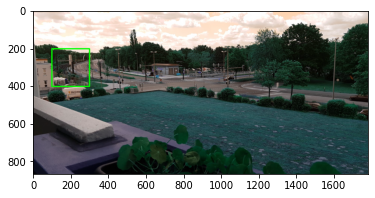

In [24]:
# Draw green rectangle on top of a region of interest in your image
balcony_copy  = img.copy()
G_in_RGB = (0,255,0)
rect_image = cv2.rectangle(balcony_copy, (100, 200), (300, 400), G_in_RGB, 6)
plt.imshow(rect_image)

[Hint](# "You will need to use the cv2 function rectangle(img, pt1, pt2, color, thickness) -> img") 

### Adding text to images

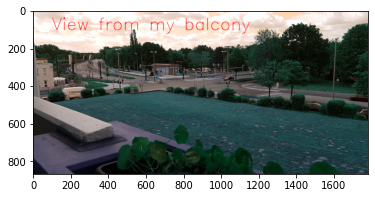

In [25]:
# Make a copy of your image and then write some text on top of the image
balcony_copy  = img.copy()
red = (255,0,0)
cv2.putText(balcony_copy,'View from my balcony', (100,100), cv2.FONT_ITALIC, 3, red, 2)
#cv2.imshow('OpenCV imshow()', balcony_copy)
plt.imshow(balcony_copy)

[Hint](# "You will need to use cv2 putText function -> putText(img, text, coordinates, fontFace, fontScale, color, thickness, lineType). For fonts check the enum cv2.FONT_HERSHEY_") 

Now that you know how to load annotate and save images lets start manually annotating some images

![](annotations.jpg)

In [38]:
# Load as many images as you like and start annotating objects in the image, 
# Before annotating the images make a copy of the image so we keep the original without changes
# Use the format proposed in the example above

def annotate_generator(img_path, annotate_text): 
    
    img = cv2.imread(img_path) #read the image 
    
    #check if image exists
    if img is None:
        sys.exit("Sorry, Could not read the image")
        
    #display the image 
    cv2.imshow('OpenCV imshow()', img) 
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    img_copy  = img.copy() #create a copy of the image
    
    # annotate user input in blue color
    blue = (0,0,255)
    cv2.putText(img_copy, annotate_text , (100,100), cv2.FONT_ITALIC, 3, blue, 2)
    
    file_name = 'annotate_' + img_path 
    cv2.imwrite(file_name, img_copy)
    
    cv2.imshow('OpenCV imshow()', img_copy) 
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()
    

#the arguments will be the path to the image and annotate text as strings
annotate_generator('my_balcony.jpg', 'Its working')

In [ ]:
# Display the images that you have annotated above, both versions, the original one and the annotated one

#done in above function

# Mini Projects

With all that you accomplished to do above you are now ready to do your first mini project!, you might need to learn some more new things to accomplish some of the harder levels below, it is very important to get used to the openCV docs 

## Meme creator

### Level 1
1. Create a basic Meme creator with one image and a short line of text, using any openCV font

### Level 2
1. Use the classic meme font (impact)

### Level 3
1. Improve it by adding 2 to 3 lines with the text on the top of the image and the bottom of the image
1. Make the text in white and with black contours

### Level 4
1. Make the text center automatically [Hint](# "getTextSize") 
1. If the text is too long it should wrap the text in as many lines as needed



In [50]:
#Meme Generator

def meme_generator(img, top_text, bottom_text1, bottom_text2):
    
    img = cv2.imread(img) #read the image 
    #check if image exists
    if img is None:
        sys.exit("Sorry, Could not read the image")
    #display the image 
    cv2.imshow('OpenCV imshow()', img) 
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    #create a copy
    img_copy  = img.copy()
    
    #resize and add user given text
    plt.figure(figsize = (10,10))
    #meme = cv2.imread(img_copy) #read the image
    #meme_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) #convert from bgr to rgb
    
    cv2.putText(img_copy, top_text, (5,25), cv2.FONT_ITALIC, 0.7, (255,255,255), 2)
    cv2.putText(img_copy, bottom_text1, (20,300), cv2.FONT_ITALIC, 0.7, (255,255,255), 2)
    cv2.putText(img_copy, bottom_text2, (20,320), cv2.FONT_ITALIC, 0.7, (255,255,255), 2)

    cv2.imshow('OpenCV imshow()', img_copy) 
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    #file_name = 'meme_'+ img
    cv2.imwrite('meme.png', img_copy)
    
        
meme_generator('jon1.png', 'The face you make', 'When the person you are stalking finds out that', 'you are stalking') 

<Figure size 720x720 with 0 Axes>

## QR Reader

### Level 1
1. Researn on the openCV docs and learn about QRCodeDetector
1. Grab any QR code from google images for example this one: ![](https://blog-trycontechnologi.netdna-ssl.com/blog/qrbatch/wp-content/uploads/sites/7/2019/07/ID-Card-with-QR-Code-2-1.png) or any other. 
1. Detect the code using QRCodeDetector
1. Print QR detected if a QR has been detected in the image

### Level 2
1. Decode and print the decoded text
1. Draw a rectangle around the QR code that has been detected and show it on screen
1. Save the QR region of the image to disk
